# Проект "Магазин игр"

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План работы
1. Открыть файл с данными и изучить общую информацию Путь к файлу: /datasets/games.csv.
2. Подготовить данные

1) Заменить названия столбцов (привести к нижнему регистру);

2) Преобразовать данные в нужные типы. Описать, в каких столбцах заменён тип данных и почему;

3) Обработать пропуски при необходимости:

4) Объяснить,у почему необходимо заполнили пропуски определённым образом или почему не надо этого делать;

5) Описать причины, которые могли привести к пропускам;

6) Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;

7) Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

3. Провести исследовательский анализ данных

1) Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2) Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3) Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы.

4) Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.

5) Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.

6) Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.

7) Соотнести выводы с продажами игр на других платформах.

8) Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):

1) Самые популярные платформы (топ-5). Опишите различия в долях продаж.

2) Самые популярные жанры (топ-5). Поясните разницу.

3) Влияет ли рейтинг ESRB на продажи в отдельном регионе?

5. Проверить гипотезы (Задайть самостоятельно пороговое значение alpha.):

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

3) Пояснить:
- Как сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

6. Написать общий вывод

## Открытие файла и предварительный анализ

### Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Открытие файла

In [2]:
df = pd.read_csv("games.csv")

### Общая информация о датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


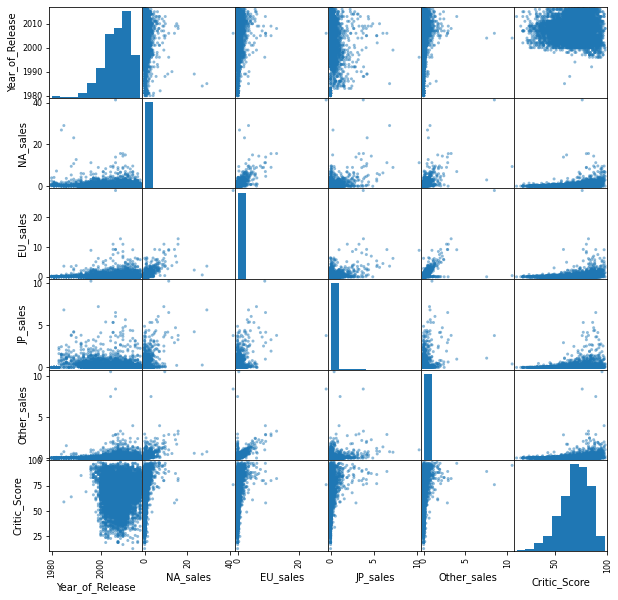

In [6]:
pd.plotting.scatter_matrix(
    df,
    figsize  = [10, 10],
);

### Описание столбцов
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Данные за 2016 год могут быть неполными.**

**Вывод.** Дата-сет открыт, названия столбцов не соответствуют соглашению, имеются пропущенные значения, выбросы и несоответствия типов данных.

## Предобработка данных

### Переименование столбцов


In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод.** Название столбцов приведены к нижнему регистру. Они изначально были в snake_case.

### Работа с дубликатами

#### Полные дубликаты строк

In [8]:
df.duplicated().sum()

0

**Вывод.** Дубликатов строк таблицы не найдено.

#### Неполные дубликаты платформ

In [9]:
df["platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Вывод.** На первый взгляд дубликатов нет. Представлены консоли со второго до восьмого поколения.

#### Неполные дубликаты жанров

In [10]:
df["genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

**Вывод.** Дубликатов нет

#### Неполные дубликаты рейтингов

In [11]:
df["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Вывод.** На первый взгляд дубликатов нет.

### Преобразование типов данных

Необходимо преобразовать:

1. year_of_release float64 -> Int - целое число с пропусками
2. critic_score str -> float64
3. user_score str -> flloat64

In [12]:
df["year_of_release"] = df["year_of_release"].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [13]:
df["critic_score"] = df["critic_score"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [14]:
try:
    df["user_score"] = df["user_score"].astype("float64")
except ValueError as e:
    print(e)

could not convert string to float: 'tbd'


**Упс!** Есть ещё строка tbd. Возможно так обозначается пропуск: to be decided or to be determined: used when something has not yet been decided or is not yet known. Заменяем на np.nan при преобразовании.

In [15]:
df["user_score"] = pd.to_numeric(df["user_score"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Вывод.** Типы приведены к желаемым.

### Работа с пропусками

#### Название игры

In [16]:
df[df["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти игры стары для нашего исследования, как экскременты мамонта. И о них мало что известно. Можем смело удалять.

In [17]:
df = df[~df["name"].isna()]

#### Год релиза 

In [18]:
df[df["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


К сожалению, если не прибегать к внешним источникам данных заполнить пропуски не так то просто, но их мало относительно общего датасета, хотя там есть тайтлы с броьшим количеством продаж. Впрочем есть один трюк. Работает он не точно но позволяет уменьшеть количество nan, у некоторых игр можно год извлечь из названия, который  с точностью до года-двух совпадёт со временем релиза. Например:

In [19]:
df[df["year_of_release"].isna()]["name"].str.extract(r'(\d{4})').value_counts()

2003    4
2004    2
2005    2
2006    2
2008    2
2002    1
2007    1
2009    1
2011    1
2013    1
dtype: int64

In [20]:
import re
p = re.compile('(\d{4})')
def extract_year(row):
    year = row["year_of_release"]
    if year is pd.NA:
        name = row['name']
        g = p.findall(name)
        if len(g) == 1:
            return int(g[0])
        else:
            return year
    else:
        return year
df["year_of_release"] = df.apply(extract_year, axis=1)
df[df["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Немного уменьшили количество пропусков. Но поменялся тип. Вернём на место.

In [21]:
df["year_of_release"] = df["year_of_release"].astype('Int64')

Остальные пропуски в году выпуска удалим.

In [22]:
df = df[~df["year_of_release"].isna()]

#### Оценки пользователей и критиков

Без дополнительных баз заполнить невозможно. У игры могут быть высокие оценки на старте, но она провалится в продаже и наоборот. Так же оценки не очень зависят от жанра: в любом жанре может быть как супер-тайтл так и полный проходняк.

#### Рейтинг ESRB
ESRB была основана в 1994 году, то есть всё что было выпузено до этого может остатьтся без рейтинга, кроме того организация основана в США и Канаде и тайтлы выпущенные за пределами этих стран и расчитанные на другие рынки часто не обязаны оцениваться по именно этому рейтингу. Nan в этом столбце заменяем спец значением  "NR" - Not rated.

In [23]:
df["rating"] = df["rating"].fillna("NR")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  Int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           16461 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Вывод.** Пропуски, где возможно, заполнены.

### Аномалии

In [24]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16461.0,16461.000000,16461.000000,16461.000000,16461.000000,7995.000000,7473.000000
mean,2006.485633,0.264267,0.146093,0.078427,0.047676,69.003127,7.127793
std,5.873318,0.818639,0.506812,0.310951,0.188042,13.925222,1.499196
min,1980.0,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.0,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.0,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.0,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.0,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


В столбцах год и оценки выбросов нет чего не скажешь о продажах. Есть мегаблокбастеры, которых не так много.

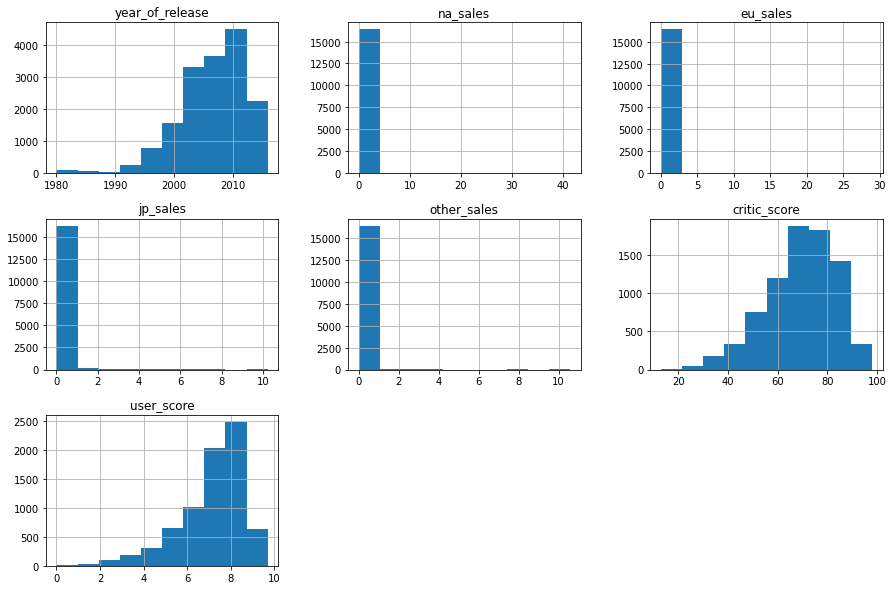

In [25]:
df.hist(figsize=(15,10));

In [26]:
df[df["na_sales"]>df['na_sales'].quantile(0.995)].sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NR
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
...,...,...,...,...,...,...,...,...,...,...,...
238,Madden NFL 2005,PS2,2004,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E
117,Gears of War 2,X360,2008,Shooter,4.15,1.90,0.06,0.64,93.0,7.7,M
112,Mario Kart: Double Dash!!,GC,2003,Racing,4.12,1.77,0.87,0.19,NaN,NaN,NR
93,The Legend of Zelda: Ocarina of Time,N64,1998,Action,4.10,1.89,1.45,0.16,NaN,NaN,NR


In [27]:
df[df["eu_sales"]>df['eu_sales'].quantile(0.995)].sort_values(by='eu_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NR
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
...,...,...,...,...,...,...,...,...,...,...,...
44,Halo 3,X360,2007,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M
139,Driver,PS,1999,Action,3.11,2.80,0.02,0.33,87.0,8.1,T
75,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,5.05,2.79,0.10,0.85,96.0,8.4,M
521,Myst,PC,1994,Adventure,0.02,2.79,0.00,0.00,NaN,NaN,NR


In [28]:
df[df["jp_sales"]>df['jp_sales'].quantile(0.995)].sort_values(by='jp_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NR
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NR
...,...,...,...,...,...,...,...,...,...,...,...
287,Street Fighter II Turbo,SNES,1992,Fighting,1.42,0.51,2.10,0.07,NaN,NaN,NR
131,Pokémon Emerald Version,GBA,2004,Role-Playing,2.57,1.58,2.06,0.21,76.0,9.0,E
740,Pro Yakyuu Family Stadium,NES,1986,Sports,0.15,0.00,2.05,0.00,NaN,NaN,NR
151,Resident Evil 2,PS,1998,Action,1.88,1.47,2.02,0.45,89.0,9.2,M


In [29]:
df[df["other_sales"]>df['other_sales'].quantile(0.995)].sort_values(by='other_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
...,...,...,...,...,...,...,...,...,...,...,...
133,Pokémon Crystal Version,GB,2000,Role-Playing,2.55,1.56,1.29,0.99,NaN,NaN,NR
125,Red Dead Redemption,PS3,2010,Action,2.79,2.53,0.17,0.99,95.0,8.8,M
121,Uncharted 2: Among Thieves,PS3,2009,Action,3.27,2.20,0.21,0.98,96.0,8.8,T
59,Super Mario 64,DS,2004,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NR


С одной стороны это выбросы, с другой - их можно пока оставить так как они обеспечат хорошую выручку для любого магазина, если конечно выйдет что то похожее по популярности.

### Общие продажи 

In [30]:
df["all_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы.

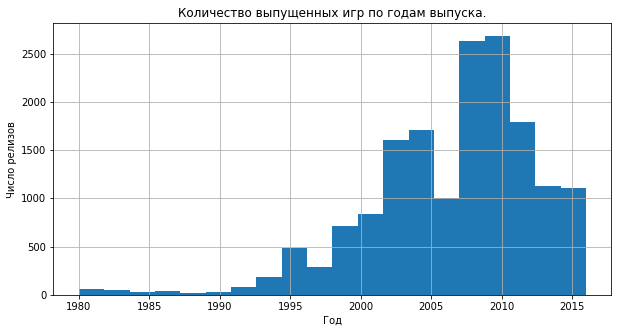

In [32]:
ax = df["year_of_release"].hist(bins=20, figsize=(10, 5))
ax.set_title("Количество выпущенных игр по годам выпуска.")
ax.set_xlabel("Год")
ax.set_ylabel("Число релизов")
ax;

**Вывод.** Период до ~93 года не очень важны ввиду малого количества выпущенных тайтлов.

### Как менялись продажи по платформам.
Определим десять платформ с наибольшими продажами.

In [33]:
df[df["year_of_release"]>=1993].groupby(by="platform")["all_sales"].sum().sort_values(ascending=False).head(10)

platform
PS2     1247.28
X360     961.30
PS3      931.34
Wii      891.18
DS       802.77
PS       727.58
PS4      314.14
GBA      312.88
PSP      290.34
3DS      257.81
Name: all_sales, dtype: float64

Теперь начертим графики суммарных продаж по годам.

In [34]:
favorite_platforms = list(df[df["year_of_release"]>=1993].groupby(by="platform")["all_sales"].sum().sort_values(ascending=False).index)[:9]
favorite_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP']

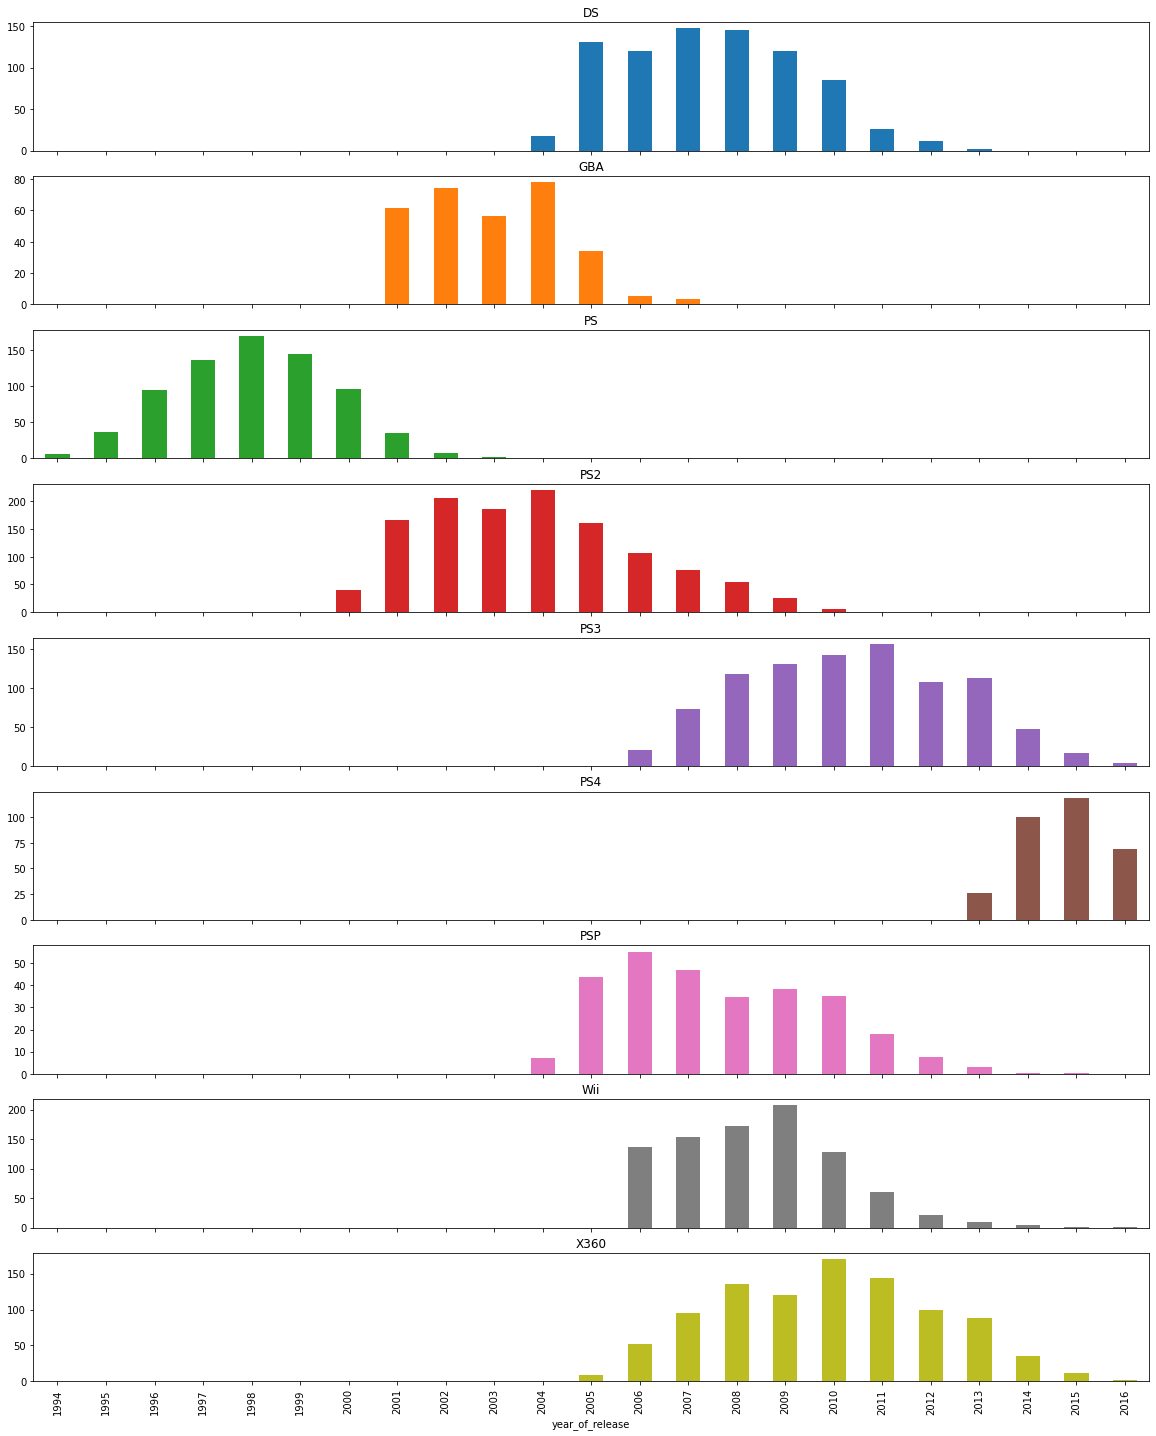

In [37]:
pd.pivot_table(df.query("year_of_release>=1993 and platform in @favorite_platforms", engine='python'),
               values="all_sales",
               index="year_of_release",
               columns=["platform"],
               aggfunc="sum").fillna(0.0).plot(kind='bar',
                                               subplots=True,
                                               figsize=(20, 25), legend=False);

**Вывод.** Среднее время активных продаж игр на платфоре - 8-10 лет. Некоторые платформы набирают популярность постепенно в течении примерно половины этого срока, другие выстреливают в течении года. 

### Определение актуального периода
Платформы остаются актуальными в течении 8-10 лет. Однако это предел и на конце срока за исключением особых платформ долгожителей (PC) дальше уже интересны лищь узкой прослойки ретрогеймеров. Для целей прогнозирования продаж на следующий год в такой динамично меняющейся индустрии, как компьютерные игр не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так как сложно будет оследить тренд по-платформам с учетом неполноты данных за 2016 и достаточно грубого шага в один год. Возьмём 4 года с 2013 года по 2016 включая.

In [39]:
df_actual = df.query("year_of_release >= 2013", engine='python')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2234 non-null   object 
 1   platform         2234 non-null   object 
 2   year_of_release  2234 non-null   Int64  
 3   genre            2234 non-null   object 
 4   na_sales         2234 non-null   float64
 5   eu_sales         2234 non-null   float64
 6   jp_sales         2234 non-null   float64
 7   other_sales      2234 non-null   float64
 8   critic_score     992 non-null    float64
 9   user_score       1193 non-null   float64
 10  rating           2234 non-null   object 
 11  all_sales        2234 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.1+ KB


###  Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.

In [40]:
df_actual.groupby(by="platform")["all_sales"].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.78
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: all_sales, dtype: float64

Осталось в актуальном периоде не так много платформ, причём PSP и DS можно на этом этапе уже списывать со счетов - продажи игр малы и сами консоли устарели безнадёжно.

Оценим тренды по актульным платформам.

In [41]:
favorite_platforms = list(df_actual.groupby(by="platform")["all_sales"].sum().sort_values(ascending=False).index)[:9]

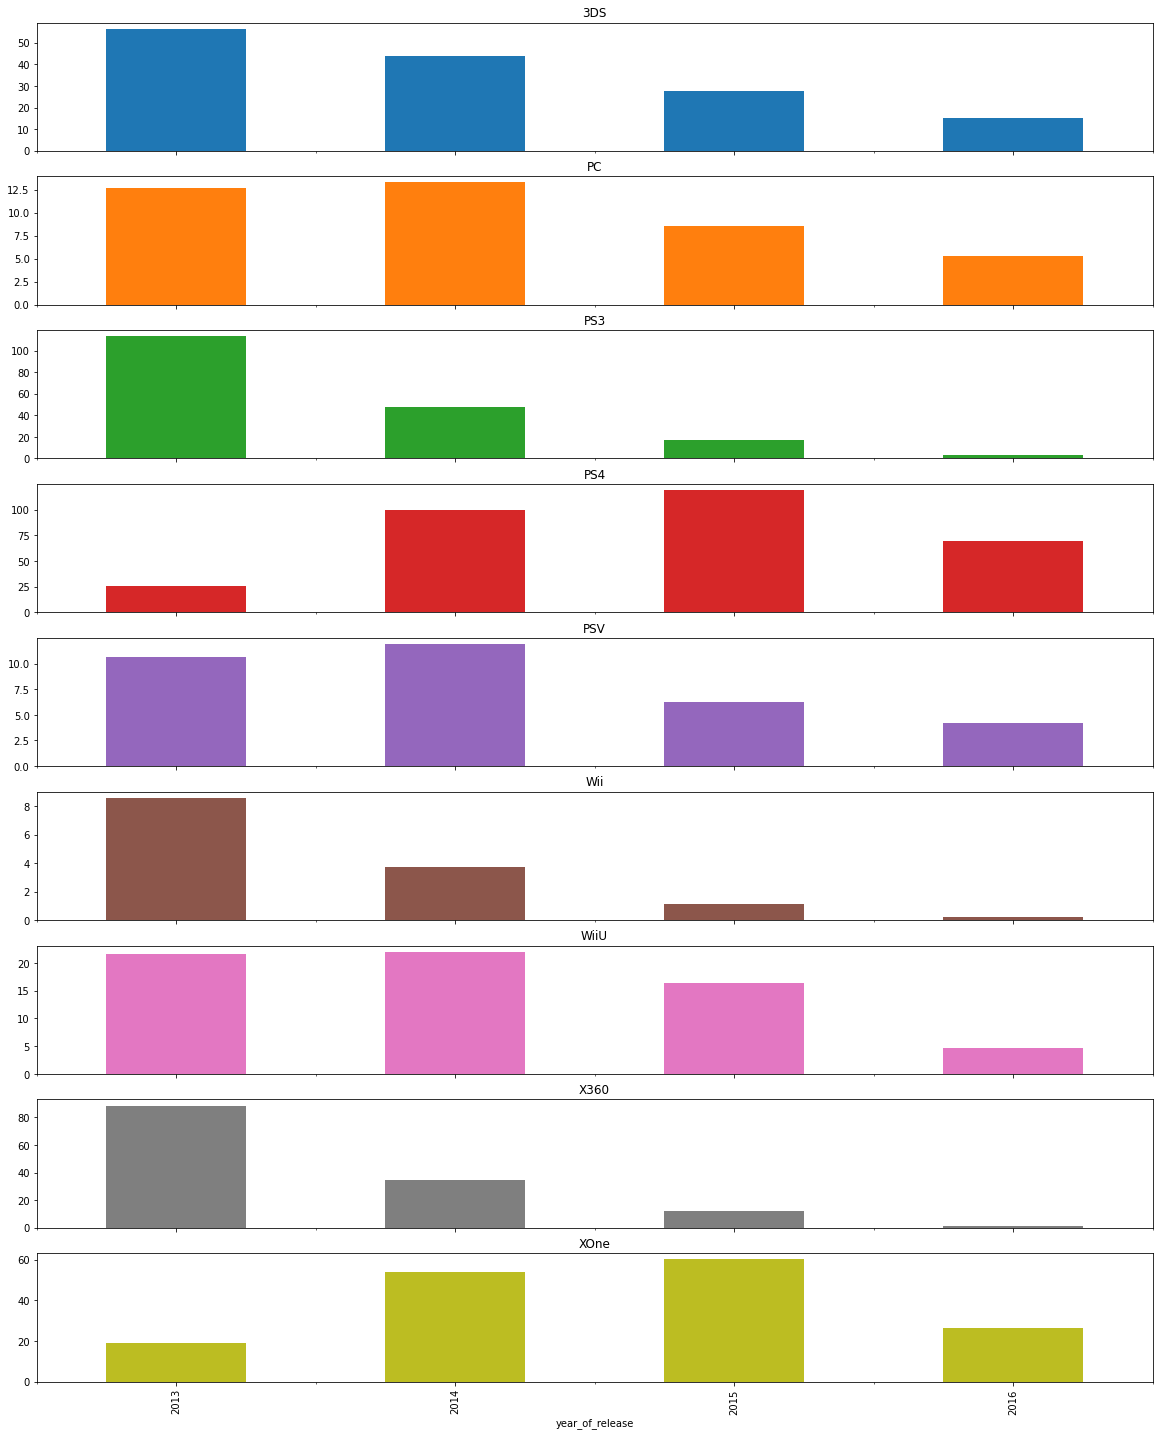

In [42]:
pd.pivot_table(df_actual.query("platform in @favorite_platforms", engine='python'),
               values="all_sales",
               index="year_of_release",
               columns=["platform"],
               aggfunc="sum").fillna(0.0).plot(kind='bar',
                                               subplots=True,
                                               figsize=(20, 25), legend=False);

**Вывод.** На взлёте находятся платформы  XOne, PS4. Они самые перспективные. WiiU уже теряет популярность, но всё ещё игры под него неплохо будут продаваться. Хуже ситуация с 3DS - она уже на излете своей славы. С PC ситуация сложнее - кажется, что платформа выдохлась, но следует учитывать, что она так и будет плестись на одном уровне и до конца не умрёт в ближайшей переспективе. Остальные платформы уже доживают свою жизнь.

### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.

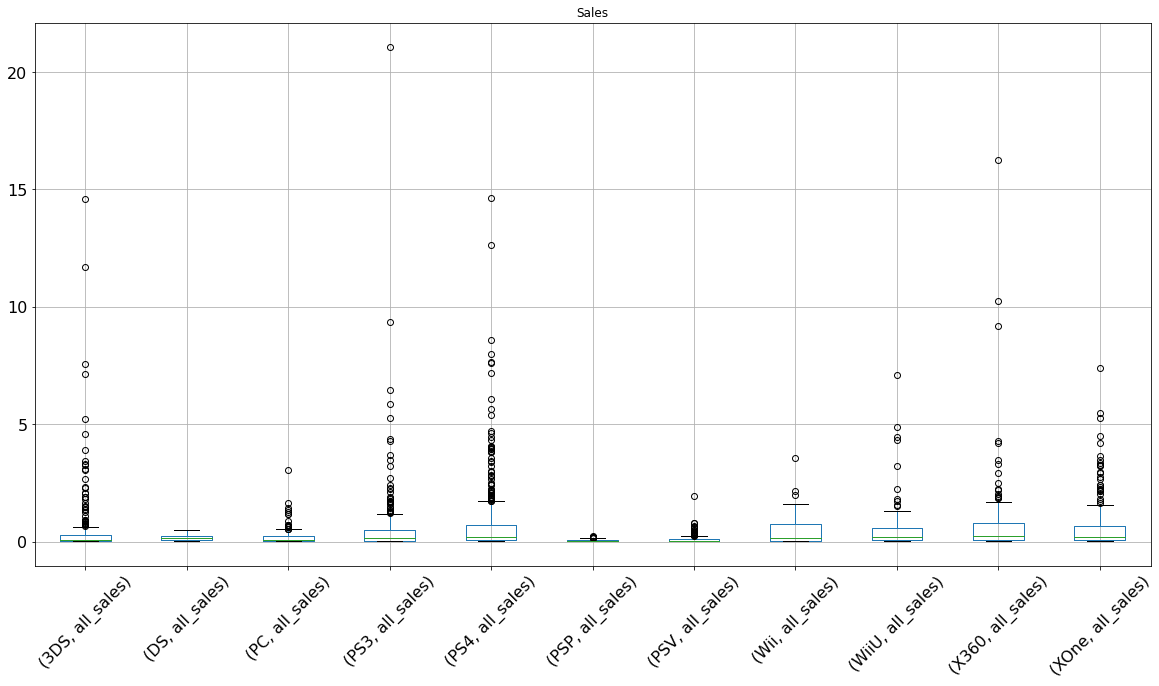

In [43]:
ax = df_actual.groupby("platform").boxplot(subplots=False,
                                           rot=45,
                                           fontsize=16,
                                           column=["all_sales"],
                                           figsize=(20, 10));
ax.set_title("Sales");
ax;

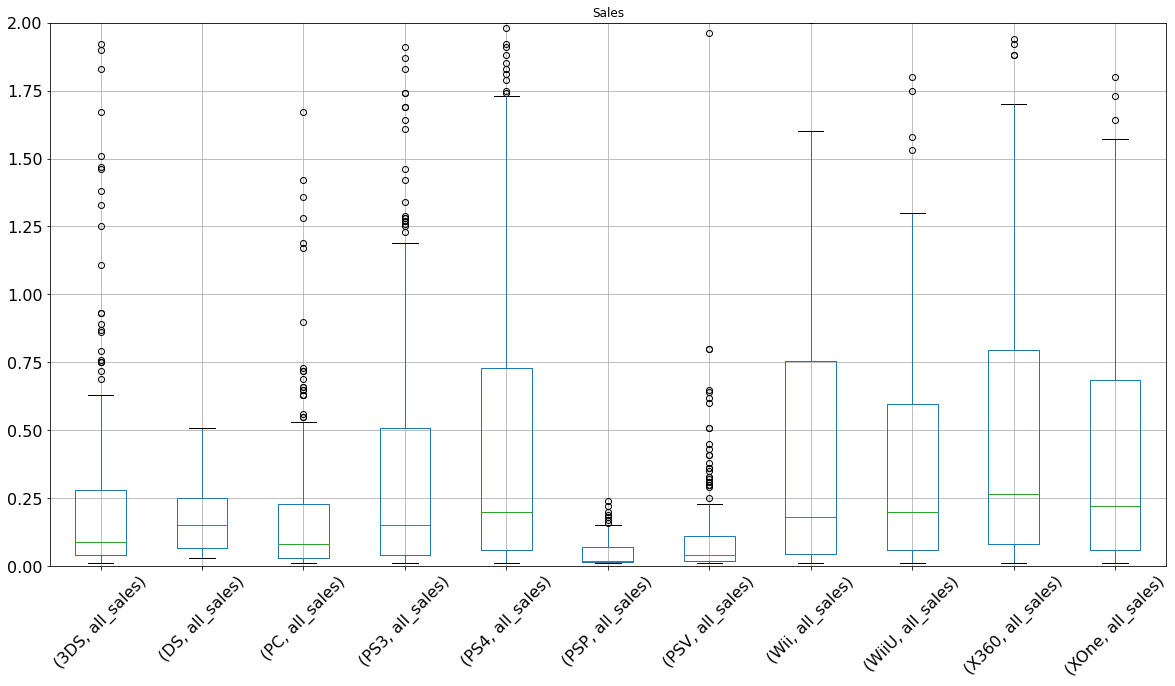

In [44]:
ax = df_actual.groupby("platform").boxplot(subplots=False,
                                           rot=45,
                                           fontsize=16,
                                           column=["all_sales"],
                                           figsize=(20, 10));
ax.set_ylim(0,2);
ax.set_title("Sales");
ax;

**Вывод.** Самые стабильные продажи игр демонстрируют тайтлы на DS. Есть платформы, где (пока) выпудено всего несколько блокбастеров которые оттягивают все продажи на себя.

### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.

In [45]:
plat = "PS4"
df_actual_PS4 = df_actual.query("platform == @plat")

#### Отзывы пользователей

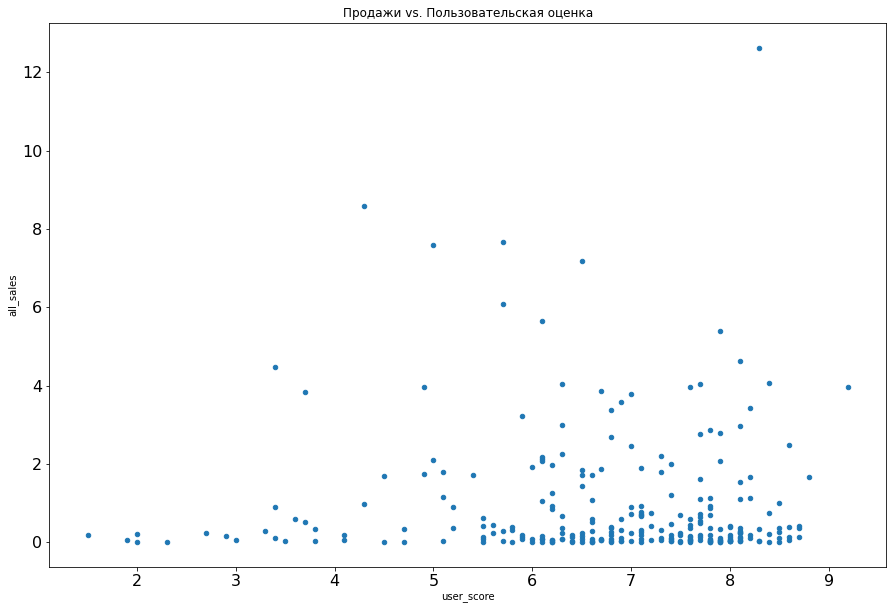

In [46]:
df_actual_PS4.plot.scatter(x="user_score",
                           y="all_sales",
                           figsize=(15,10),
                           title="Продажи vs. Пользовательская оценка",
                           fontsize=16);

Зависимости особой не видно, есть интересная закономерность: игры с низким рейтингом - продаются плохо, а вот с высоким разброс значительно больше: есть как блокбастеры так и не очень продающиеся тайтлы. Последнее по-видимому может быть связано не только с провалом игры в продажах, но и в том, что могут быть игры которые понравились определённой аудитории не нацеленные на очень массовый рынок.

Посчитаем всё же корреляции:

In [47]:
r_pearson = df_actual_PS4['all_sales'].corr(df_actual_PS4["user_score"])
r_spearman = df_actual_PS4['all_sales'].corr(df_actual_PS4["user_score"], method="spearman")
print(f"R (Pearson) = {r_pearson:.2%}\nR (Spearman) = {r_spearman:.2%}")

R (Pearson) = -3.20%
R (Spearman) = -2.83%


**Вывод.** Связь между пользовательским рейтингом и продажами для платформы PS4 практически отсутствует.

#### Отзывы критиков

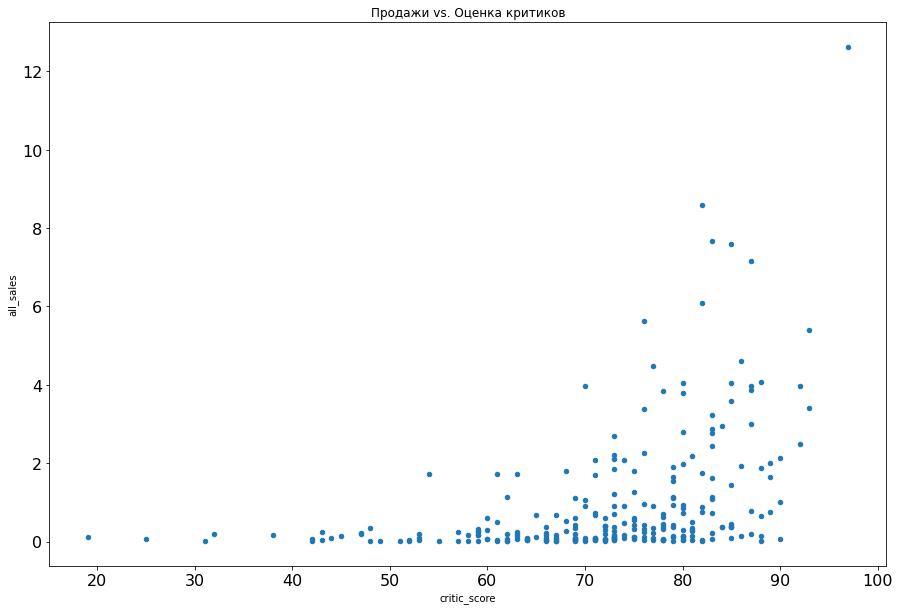

In [48]:
df_actual_PS4.plot.scatter(x="critic_score",
                           y="all_sales",
                           figsize=(15,10),
                           title="Продажи vs. Оценка критиков",
                           fontsize=16
                          );

Определённо связь есть. Картина более линейна и меньше разброс продаж с высоким рейтингом, по-видимому, потому что, критики работают на массовый рынок и более объективны чем фанаты-гики (:)). Конечно есть ещё и серые схемы: крупные издатели нацеленные на высокие продажи иногда "покупают" оценки игровых критиков.

Посчитаем корреляции:

In [49]:
r_pearson = df_actual_PS4['all_sales'].corr(df_actual_PS4["critic_score"])
r_spearman = df_actual_PS4['all_sales'].corr(df_actual_PS4["critic_score"], method="spearman")
print(f"R (Pearson) = {r_pearson:.2%}\nR (Spearman) = {r_spearman:.2%}")

R (Pearson) = 40.66%
R (Spearman) = 50.82%


**Вывод.** Наблюдается прямая средняя (по более робастной мере) связь между продажами и оценками критиков.

### Соотнести выводы с продажами игр на других платформах.

In [50]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

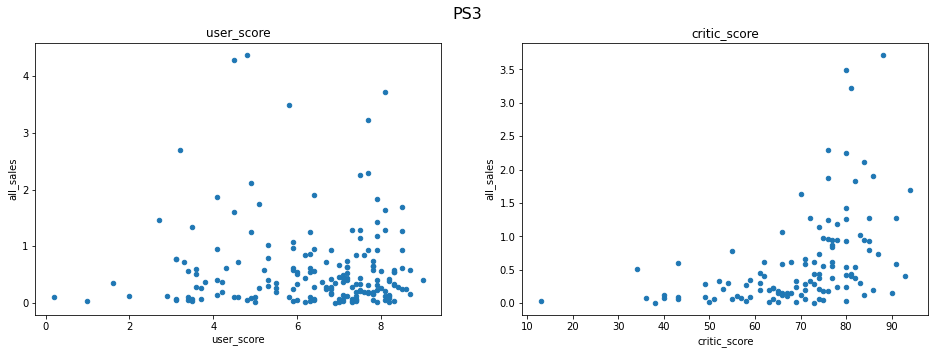

R (Pearson) = -2.51%					R (Pearson) = 44.22%
R (Spearman) = 2.93%					R (Spearman) = 57.04%


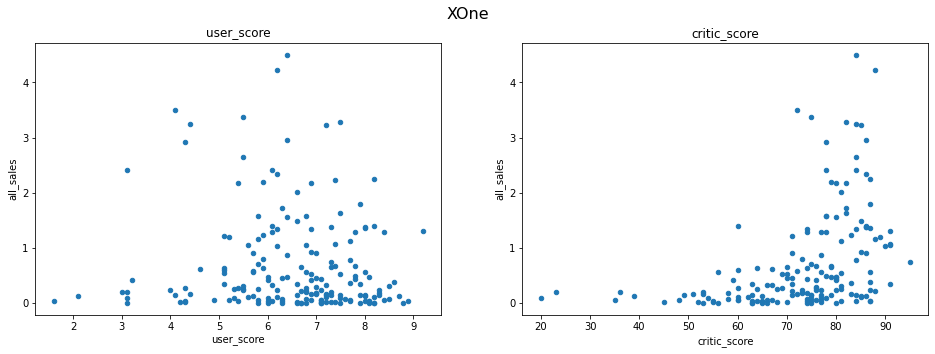

R (Pearson) = -8.56%					R (Pearson) = 40.71%
R (Spearman) = -10.31%					R (Spearman) = 52.11%


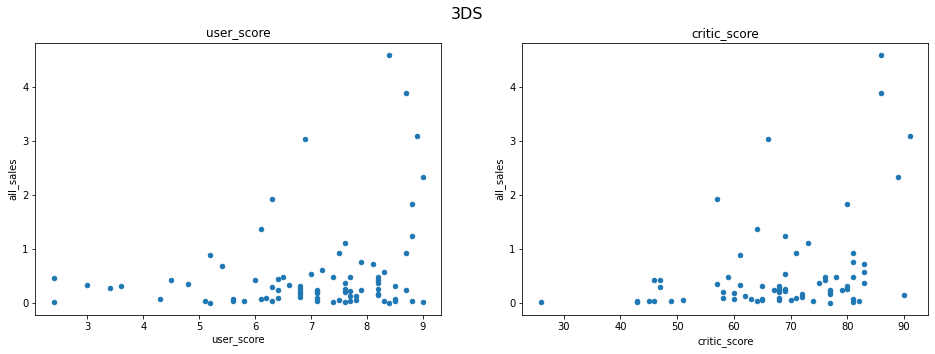

R (Pearson) = 24.15%					R (Pearson) = 35.71%
R (Spearman) = 14.27%					R (Spearman) = 36.49%


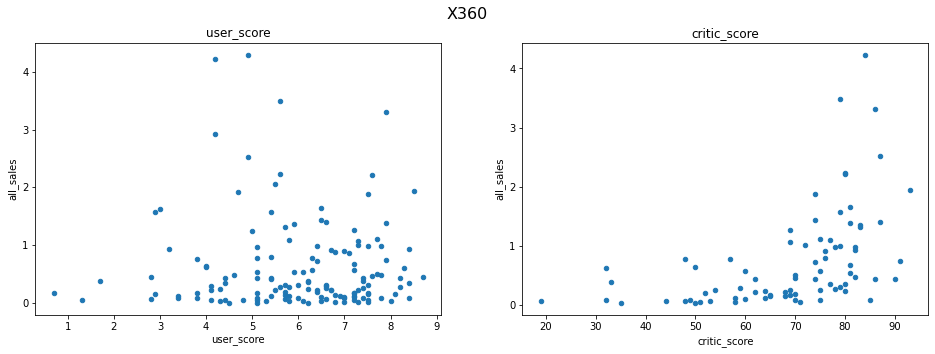

R (Pearson) = -2.79%					R (Pearson) = 47.79%
R (Spearman) = 3.65%					R (Spearman) = 62.21%


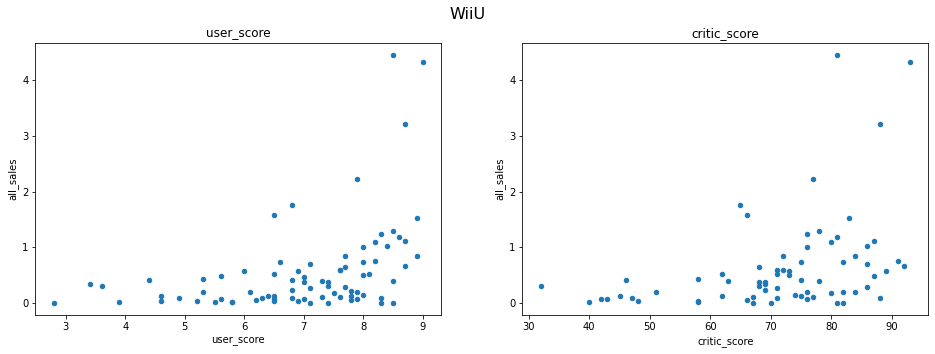

R (Pearson) = 41.72%					R (Pearson) = 38.05%
R (Spearman) = 49.36%					R (Spearman) = 44.74%


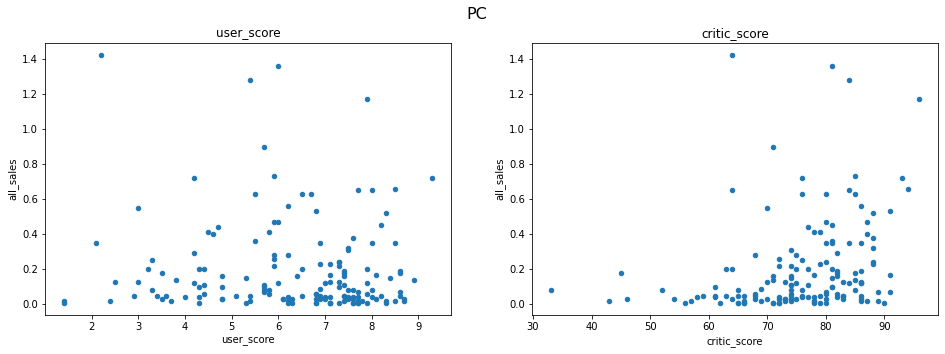

R (Pearson) = -6.49%					R (Pearson) = 27.95%
R (Spearman) = -8.20%					R (Spearman) = 37.25%


In [51]:
top_platforms = ["PS3", "XOne", "3DS","X360", "WiiU", "PC"]
for plat in top_platforms:
    df_actual_plat = df_actual[df_actual['platform'] == plat]
    df_r = df_actual_plat[df_actual_plat['all_sales'] < df_actual_plat['all_sales'].quantile(0.99)]
    fig, axes = plt.subplots(1, 2, figsize=(16,5))
    fig.suptitle(plat, fontsize=16)
    df_r.plot.scatter(x="user_score", y="all_sales", ax=axes[0]);
    axes[0].set_title("user_score");
    df_r.plot.scatter(x="critic_score", y="all_sales", ax=axes[1]);
    axes[1].set_title("critic_score");
    plt.show();
    r_pearson_u = df_r['all_sales'].corr(df_r["user_score"])
    r_spearman_u = df_r['all_sales'].corr(df_r["user_score"], method="spearman")
    r_pearson_c = df_r['all_sales'].corr(df_r["critic_score"])
    r_spearman_c = df_r['all_sales'].corr(df_r["critic_score"], method="spearman")
    print(f"""R (Pearson) = {r_pearson_u:.2%}\t\t\t\t\tR (Pearson) = {r_pearson_c:.2%}
R (Spearman) = {r_spearman_u:.2%}\t\t\t\t\tR (Spearman) = {r_spearman_c:.2%}""")
    

**Вывод.** На топ популярных в выбранном периоде платформ связь с продажами оценок критиков намного сильнее, чем с оценками пользователей. На большинстве платформах связь продаж с оценками пользователей очень слабая либо практически отсутствует. Наблюдаются обратные связи. Видимо они обусловлены следующим: с высокими продажами пользователей больше и у большего количества их игра не оправдывает ожидания, а, как известно, если человек испытывает негативные эмоции он с большей вероятностью совершит действие (поставит плохую оценку), чем тот, чьи ожидания оправдались.
Впрочем из любого правила есть исключени WiiU :-). 

### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Распределение игр по жанрам. 

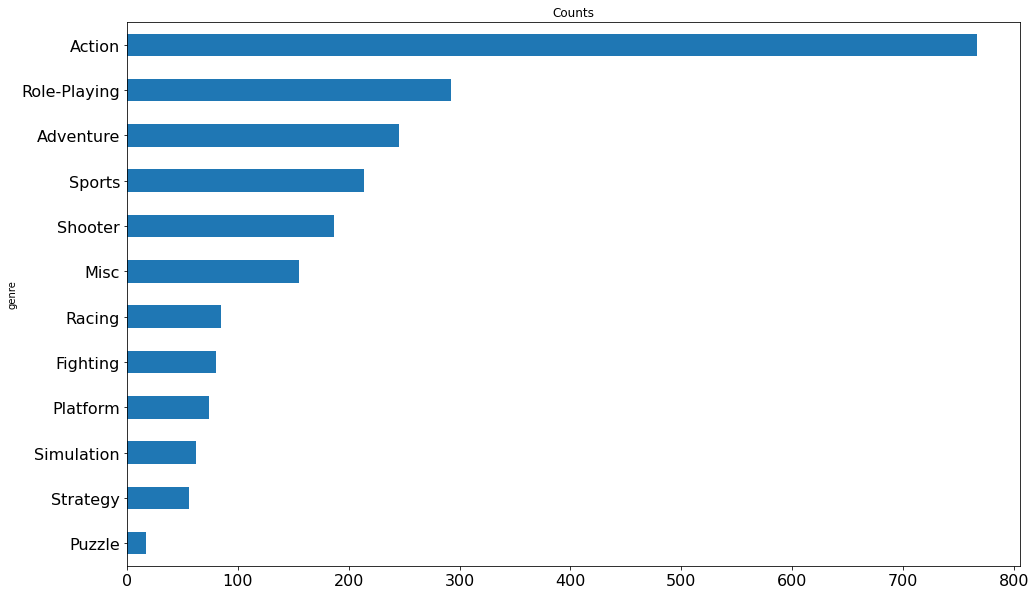

In [52]:
df_actual.groupby('genre')["genre"].count().sort_values(
    ascending=True).plot(kind='barh', title="Counts", fontsize=16, figsize=(16, 10));

**Вывод.** За рассматриваемый период больше всего выпущено игр-экшенов, меньше всего игр-пазлов и стратегий.

#### Анализ продаж игр по жанрам

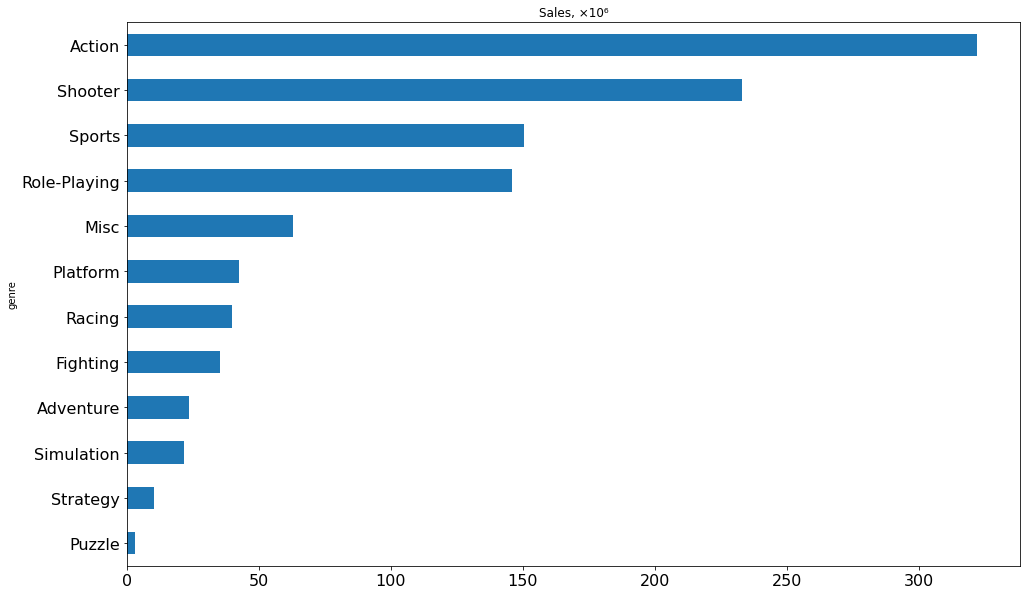

In [53]:
df_actual.groupby('genre')["all_sales"].sum().sort_values(
    ascending=True).plot(kind='barh', title="Sales, \u2a2f10\u2076", fontsize=16, figsize=(16, 10));

**Вывод.** Есть лидер продаж - экшены. На втором и третьем месте с большим отрывом следуют шутеры и спортивные игры. Аутсайдеры: стратегии и пазлы. Эти жанры переживают не лучшие времена. Однако можно ещё посмотреть разбивку по жанрам числа проданных копий на одну игру. 

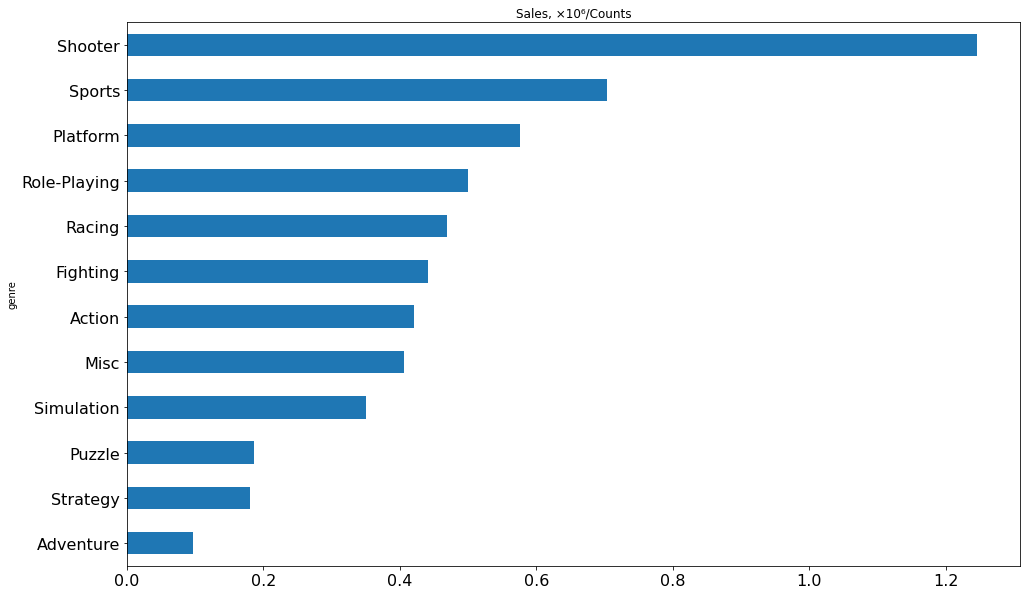

In [54]:
df_actual.groupby('genre')["all_sales"].mean().sort_values(
    ascending=True).plot(kind='barh', title="Sales, \u2a2f10\u2076/Counts", fontsize=16, figsize=(16, 10));

**Вывод2!** Ситуация c топом поменялась, более продаваемым оказались шутеры, а в экшен-играх по-видимому больше проходняка. Однако стратегии и пазлы и здесь плетуться в хвосте.

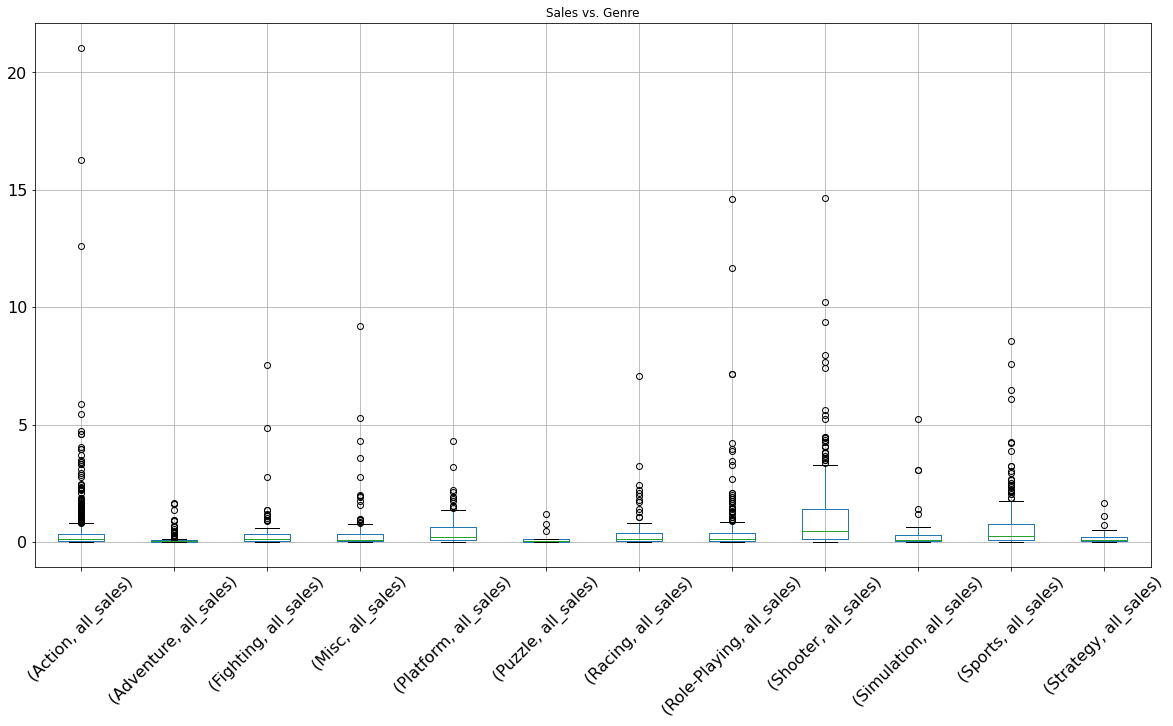

In [55]:
ax = df_actual.groupby("genre").boxplot(subplots=False,
                                        rot=45,
                                        fontsize=16,
                                        figsize=(20, 10),
                                        column=["all_sales"]);
ax.set_title("Sales vs. Genre");
ax;

Шутеры обеспечивают более стабильные продажи чем экшены.

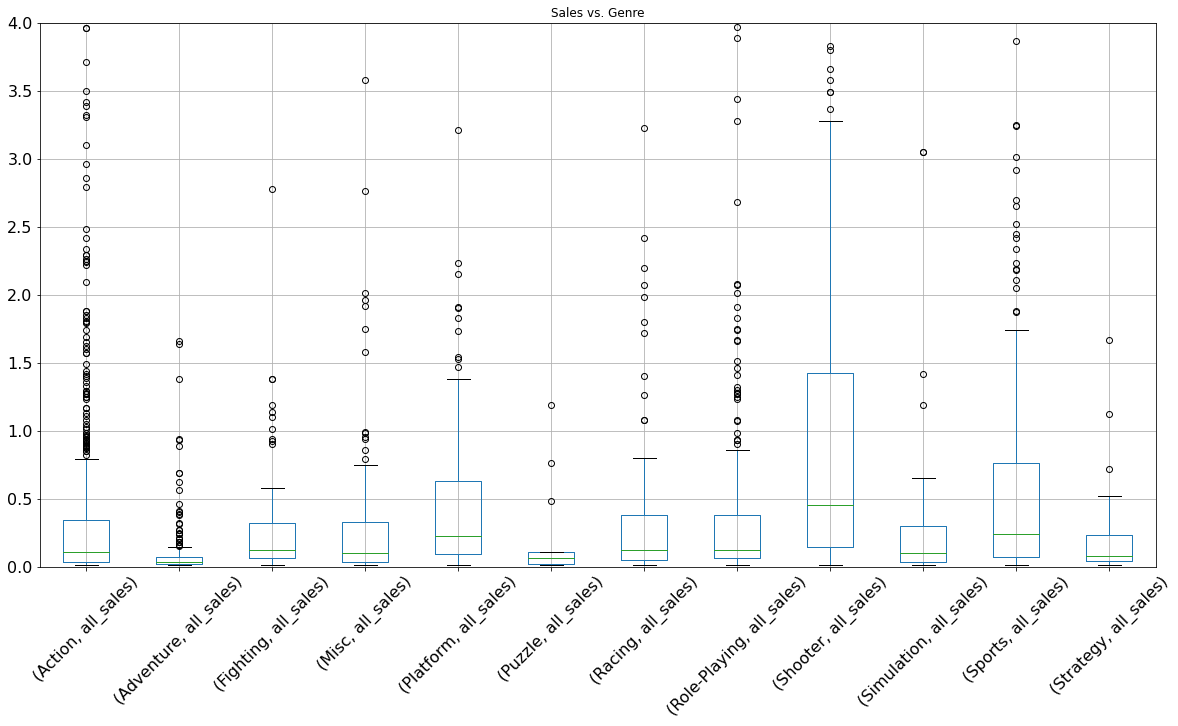

In [56]:
ax = df_actual.groupby("genre").boxplot(subplots=False,
                                        rot=45,
                                        fontsize=16,
                                        figsize=(20, 10),
                                        column=["all_sales"]);
ax.set_title("Sales vs. Genre");
ax.set_ylim(0,4);
ax;

##  Портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы.

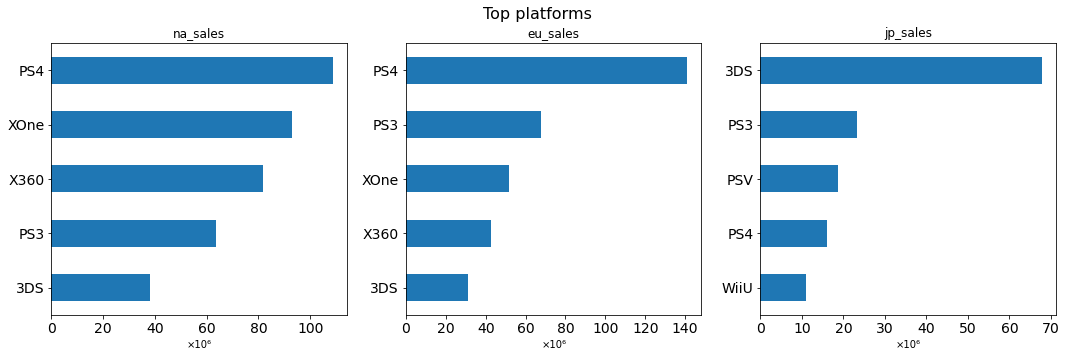

In [57]:
reg_sales = ["na_sales", "eu_sales", "jp_sales"]
fig, axes = plt.subplots(1, 3, figsize=(18,5));
fig.suptitle("Top platforms", fontsize=16)
for i, reg in enumerate(reg_sales):
    df_actual.groupby("platform")[reg].sum().sort_values(
        ascending=True).iloc[-5:].plot(kind='barh', title=reg, ax=axes[i], fontsize=14) 
    axes[i].set_xlabel("\u2a2f10\u2076")
    axes[i].set_ylabel(None)

<ipython-input-58-6345c4acc6ba>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5 = top_5.append(pd.Series(other_sales, index=["other"]))
<ipython-input-58-6345c4acc6ba>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5 = top_5.append(pd.Series(other_sales, index=["other"]))
<ipython-input-58-6345c4acc6ba>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5 = top_5.append(pd.Series(other_sales, index=["other"]))


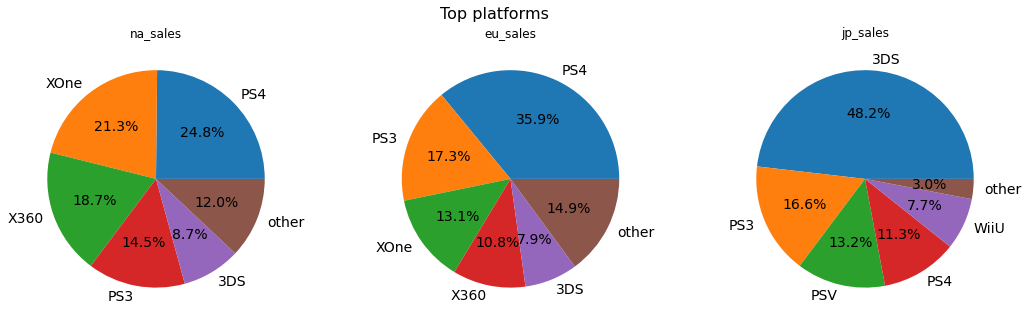

In [58]:
reg_sales = ["na_sales", "eu_sales", "jp_sales"]
fig, axes = plt.subplots(1, 3, figsize=(18,5));
fig.suptitle("Top platforms", fontsize=16)
for i, reg in enumerate(reg_sales):
    df_sales = df_actual.groupby("platform")[reg].sum().sort_values(ascending=False)
    top_5 = df_sales[0:5].copy();
    other_sales = df_sales.sum() - top_5.sum()
    top_5 = top_5.append(pd.Series(other_sales, index=["other"]))
    top_5.plot(kind='pie', title=reg, ax=axes[i], fontsize=14, autopct='%1.1f%%') 
    axes[i].set_ylabel(None)

**Вывод.** Европейский рынок по этому параметру не сильно отличается от американского. В тоже время Японский значительно отличается полным засилием платформ японских производителей. Microsoft не в почеёте.

### Самые популярные жанры

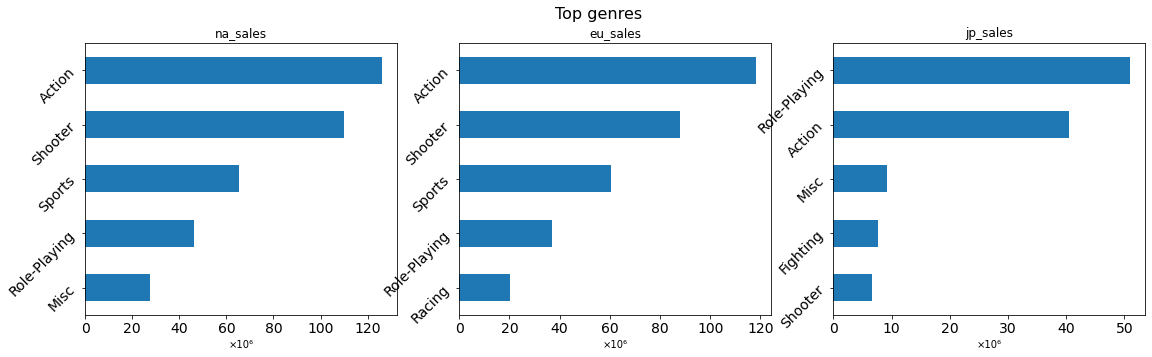

In [59]:
reg_sales = ["na_sales", "eu_sales", "jp_sales"]
fig, axes = plt.subplots(1, 3, figsize=(19,5));
fig.suptitle("Top genres", fontsize=16)
for i, reg in enumerate(reg_sales):
    df_actual.groupby("genre")[reg].sum().sort_values(
        ascending=True).iloc[-5:].plot(kind='barh', title=reg, ax=axes[i], fontsize=14, rot=45) 
    axes[i].set_xlabel("\u2a2f10\u2076")
    axes[i].set_ylabel(None)    

<ipython-input-60-ec00cd3d2d21>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5 = top_5.append(pd.Series(other_sales, index=["other"]))
<ipython-input-60-ec00cd3d2d21>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5 = top_5.append(pd.Series(other_sales, index=["other"]))
<ipython-input-60-ec00cd3d2d21>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5 = top_5.append(pd.Series(other_sales, index=["other"]))


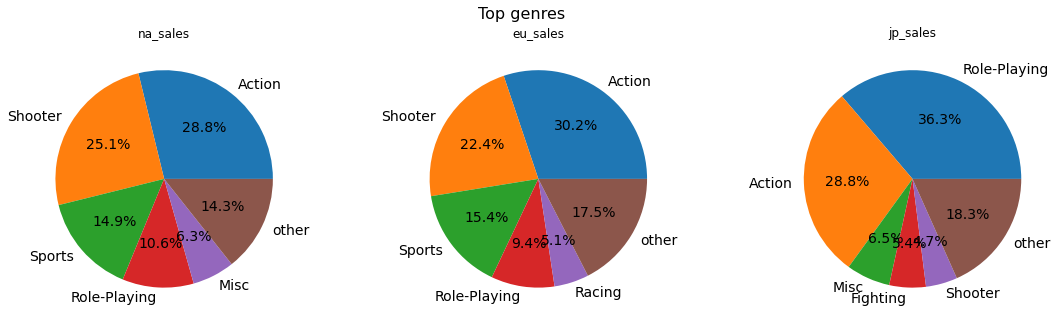

In [60]:
reg_sales = ["na_sales", "eu_sales", "jp_sales"]
fig, axes = plt.subplots(1, 3, figsize=(19,5));
fig.suptitle("Top genres", fontsize=16)
for i, reg in enumerate(reg_sales):
    df_sales = df_actual.groupby("genre")[reg].sum().sort_values(ascending=False)
    top_5 = df_sales[0:5].copy();
    other_sales = df_sales.sum() - top_5.sum()
    top_5 = top_5.append(pd.Series(other_sales, index=["other"]))
    top_5.plot(kind='pie', title=reg, ax=axes[i], fontsize=14, autopct='%1.1f%%') 
    axes[i].set_ylabel(None)

**Вывод.** Европейский рынок и американский очень похожи - лидирует с большим отрывом экшен-игры, на втором месте - стрелялки, замыкают пятёрку ролевые игры. И совсем от них отличается японский. Про страсть японцев к ролевым компьютерным играм ходят легенды, и это здесь видно. Кроме того уехали куда то стрелялки.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

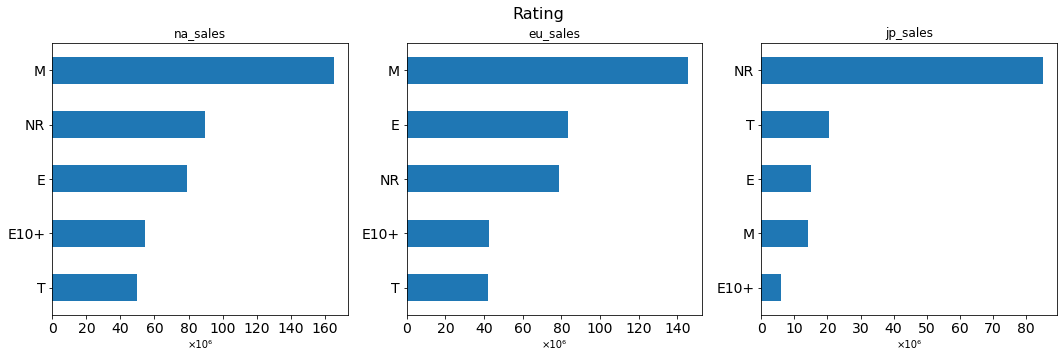

In [61]:
reg_sales = ["na_sales", "eu_sales", "jp_sales"]
fig, axes = plt.subplots(1, 3, figsize=(18,5));
fig.suptitle("Rating", fontsize=16)
for i, reg in enumerate(reg_sales):
    df_actual.groupby("rating")[reg].sum().sort_values(
        ascending=True).plot(kind='barh', title=reg, ax=axes[i], fontsize=14) 
    axes[i].set_xlabel("\u2a2f10\u2076")
    axes[i].set_ylabel(None)

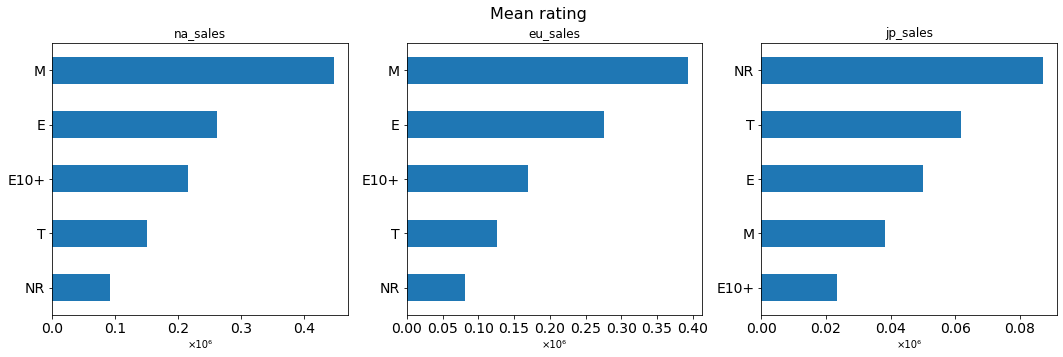

In [62]:
reg_sales = ["na_sales", "eu_sales", "jp_sales"]
fig, axes = plt.subplots(1, 3, figsize=(18,5));
fig.suptitle("Mean rating", fontsize=16)
for i, reg in enumerate(reg_sales):
    df_actual.groupby("rating")[reg].mean().sort_values(
        ascending=True).plot(kind='barh', title=reg, ax=axes[i], fontsize=14) 
    axes[i].set_xlabel("\u2a2f10\u2076")
    axes[i].set_ylabel(None)

**Вывод.** В Европе и Америке продажи и средние продажи на один тайтл сильно зависят от возрастного рейтинга. В Японии всё не так однозначно,так как лидируют в продаже игры вообще без рейтинга ESRB потому, что там присутствует своя ретинговая маркировка игр CERO, меньше оглядывающаяся на ESRB.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Формулируем гипотезы:**
- Нулевая (H(0)): средние значения пользовательских рейтингов платформ Xbox One и PC равны. Так как H0 связано с условием равенства.
- Альтернативная (H(1)): средние значения пользовательских рейтингов платформ Xbox One и PC не равны.
В качестве критерия возьмём парный двухсторонний t-student для среднего выборок. Если мы отвергнем нулевую гипотезу то рейтинги пользователей будут не одинаковые.
Установим стандартное значение alpha = 0.05

In [63]:
results = st.ttest_ind(df.loc[(df['platform']=='XOne') & (~df['user_score'].isna()),'user_score'],
                       df.loc[(df['platform']=='PC') & (~df['user_score'].isna()),'user_score'],
                       equal_var = False) # вызов метода для проверки гипотезы
alpha = .05 # задайте значение уровня значимости
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(f"""Средний пользовательский рейтинг для XOne {df.loc[df['platform']=='XOne', 'user_score'].mean()},
для PC - {df.loc[df['platform']=='PC', 'user_score'].mean()}""")

4.20093729348826e-06
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг для XOne 6.521428571428572,
для PC - 7.067857142857143


**Вывод.** Так как мы отвергли нулевую гипотезу то при соответствующем alpha можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC **не** одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Формулируем гипотезы:**
- Нулевая (H(0)): средние значения пользовательских рейтингов жанров Action и Sports равны. Так как H0 связано с условием равенства.
- Альтернативная (H(1)): средние значения пользовательских рейтингов жанров Action и Sports не равны.
В качестве критерия возьмём парный двухсторонний t-student для среднего выборок. Здесь меняется соотнесение бизнесс гипотезу и стат-гипотез. При отклонении нулевой гипотезы мы подтверждаем бизнесс гипотезу в отличие от предыдущего случая.
Установим стандартное значение alpha = 0.05

In [64]:
results = st.ttest_ind(df.loc[(df['genre']=='Action') & (~df['user_score'].isna()),'user_score'],
                       df.loc[(df['genre']=='Sports') & (~df['user_score'].isna()),'user_score'],
                       equal_var = False) # вызов метода для проверки гипотезы
alpha = .05 # задайте значение уровня значимости
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(f"""Средний пользовательский рейтинг для Sports {df.loc[df['genre']=='Sports', 'user_score'].mean()},
для Action - {df.loc[df['genre']=='Action', 'user_score'].mean()}""")

0.09455979262895202
Не получилось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг для Sports 6.959466911764705,
для Action - 7.058931552587646


**Вывод.** Так как не получилось отвергнуть нулевую гипотезу то при соответствующем alpha можем утверждать, что средние пользовательские рейтинги игр жанров Action и Sports **одинаковые**.

## Общий вывод

Дата-сет открыт, название столбцов приведены к нижнему регистру. Полных и частичных дубликатов не найдено. Типы приведены к желаемым. Пропуски, где возможно, заполнены.

Определено, что период до 1993 года не очень важен для проводимого исследования ввиду малого количества выпущенных тайтлов. Определено среднее время активных продаж игр для игровой платформы, оно составляет 8-10 лет. Некоторые платформы набирают популярность постепенно в течении примерно половины этого срока, другие выстреливают в течении года. Для целей прогнозирования продаж на следующий год в такой динамично меняющейся индустрии, как компьютерные игр не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так как сложно будет оследить тренд по-платформам с учетом неполноты данных за 2016 и достаточно грубого шага в один год. Возьмём 4 года с 2013 года по 2016 включая.

Лидирующие по продажам платформы за актуальный период:"PS4", PS3", "XOne", "3DS","X360", "WiiU", "PC". На взлёте находятся платформы  XOne, PS4. Они самые перспективные в плане продаж. WiiU уже теряет популярность, но всё ещё игры под него неплохо будут продаваться. Хуже ситуация с 3DS - она уже на излете своей славы. С PC ситуация сложнее - кажется, что платформа выдохлась, но следует учитывать, что она так и будет плестись на одном уровне и до конца не умрёт в ближайшей переспективк. Остальные платформы уже доживают свою жизнь.

Для топ популярных в выбранном периоде платформ связь оценок критиков с продажами  намного сильнее, чем с оценками пользователей. На топ популярных в выбранном периоде платформ связь с продажами оценок критиков намного сильнее, чем с оценками пользователей. На большинстве платформах связь продаж с оценками пользователей очень слабая либо практически отсутствует. Наблюдаются обратные связи. Видимо они обусловлены следующим: с высокими продажами пользователей больше и у большего количества их игра не оправдывает ожидания, а, как известно, если человек испытывает негативные эмоции он с большей вероятностью совершит действие (поставит плохую оценку), чем тот, чьи ожидания оправдались.То есть для прогноза продаж лучше использовать оценки критиков, а не игроков.

За рассматриваемый период больше всего выпущено игр-экшенов, меньше всего игр-пазлов и стратегий. Есть лидер продаж - экшены. На втором и третьем месте с большим отрывом следуют шутеры и спортивные игры. Аутсайдеры: стратегии и пазлы. Эти жанры переживают не лучшие времена. При анализе среднего числа проданных копий на одну игру более продаваемым оказались шутеры, а в экшен-играх по-видимому больше проходняка. Однако стратегии и пазлы и здесь плетуться в хвосте.

Европейский рынок по топ-5 платформ (по продажам игр за актуальный период) не сильно отличается от американского, разве что присутствием в топе PC и первое и второе место поменяны местами. Последнее можно объяснить тем, что производитель XBox американская компания и поддержка у неё в Америке выше. В тоже время Японский значительно отличается полным засилием платформ японских производителей. Microsoft не в почёте.

Европейский рынок и американский рынок по топ-5 жанров очень похожи  - лидирует с большим отрывом экшен-игры, на втором месте - стрелялки. И совсем от них отличается японский рынок. Про страсть японцев к ролевым компьютерным играм ходят легенды, и это здесь видно - они лидируют.

В Европе и Америке продажи и средние продажи на один тайтл сильно зависят от возрастного рейтинга. В Японии всё не так однозначно,так как лидируют в продаже игры вообще без рейтинга.

Средние пользовательские рейтинги платформ Xbox One и PC **не** одинаковые. Средние пользовательские рейтинги игр жанров Action и Sports **одинаковые**.
**Для рекламной компании:** Стоит вложиться в рекламу игр на XOne, PS4, так как игры на них уже неплохо продаются и находятся на взлете продаж. По жанрам стоит больше внимания уделять шутерам на европейском и американском рынке и РПГ на японском. Но стоит отметить что приоритет стоит отдавать именно американскому и европейскому, так как японский рынок отличается сильно предпочтениями и рейтинговой системой. Стоит отдавать предпочтение играм с рейтингом для подростков и взрослых.Стоит обращать внимание на отзывы критиков, но не пользователей. 